In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

raw = pd.read_csv('power_plant_data.csv')

raw.head()
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
 5   SrNum   9568 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 448.6 KB


In [2]:
X_index = raw[['PE']]
Y_index = raw[['AP']]
x = X_index.iloc[:50,:]
y = Y_index.iloc[:50,:]


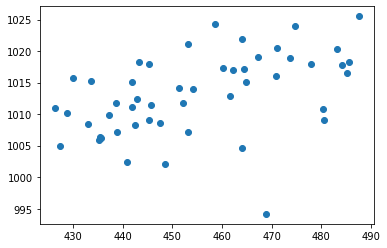

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(x, y)

LinearRegression()

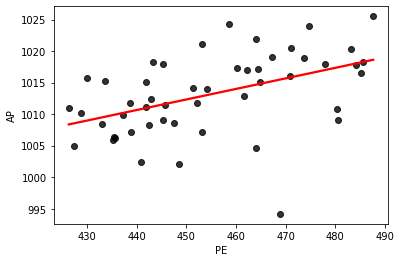

In [5]:
# importing libraries
import seaborn as sb
  
# use regplot
regr_x_to_y = sb.regplot(x = x,
            y = y, 
            ci = None,
            data = raw,
            scatter_kws={"color": "black"},
            line_kws={"color": "red"})

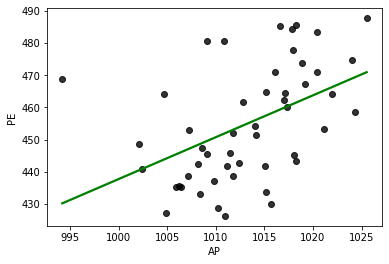

In [6]:
regr_y_to_x = sb.regplot(x = y,
            y = x, 
            ci = None,
            data = raw,
            scatter_kws={"color": "black"},
            line_kws={"color": "green"})

In [7]:
import statistics
from statistics import mean
line_x = regr_x_to_y.get_lines()[0].get_xdata()
line_y = regr_x_to_y.get_lines()[0].get_ydata()

In [8]:
line_x = line_x[::2]
line_y = line_y[::2]

In [9]:
print("X values of regression line:\n", line_x)

X values of regression line:
 [426.25       427.49121212 428.73242424 429.97363636 431.21484848
 432.45606061 433.69727273 434.93848485 436.17969697 437.42090909
 438.66212121 439.90333333 441.14454545 442.38575758 443.6269697
 444.86818182 446.10939394 447.35060606 448.59181818 449.8330303
 451.07424242 452.31545455 453.55666667 454.79787879 456.03909091
 457.28030303 458.52151515 459.76272727 461.00393939 462.24515152
 463.48636364 464.72757576 465.96878788 467.21       468.45121212
 469.69242424 470.93363636 472.17484848 473.41606061 474.65727273
 475.89848485 477.13969697 478.38090909 479.62212121 480.86333333
 482.10454545 483.34575758 484.5869697  485.82818182 487.06939394]


In [10]:
print("Y values of regression line:\n", line_y)

Y values of regression line:
 [1008.36509252 1008.57229185 1008.77949118 1008.9866905  1009.19388983
 1009.40108916 1009.60828849 1009.81548781 1010.02268714 1010.22988647
 1010.43708579 1010.64428512 1010.85148445 1011.05868378 1011.2658831
 1011.47308243 1011.68028176 1011.88748109 1012.09468041 1012.30187974
 1012.50907907 1012.71627839 1012.92347772 1013.13067705 1013.33787638
 1013.5450757  1013.75227503 1013.95947436 1014.16667368 1014.37387301
 1014.58107234 1014.78827167 1014.99547099 1015.20267032 1015.40986965
 1015.61706898 1015.8242683  1016.03146763 1016.23866696 1016.44586628
 1016.65306561 1016.86026494 1017.06746427 1017.27466359 1017.48186292
 1017.68906225 1017.89626157 1018.1034609  1018.31066023 1018.51785956]


In [11]:
print("Therefore estimated mean of first attribute would be:\n", line_x.mean())
print("-and estimated mean of second attribute would be:\n", line_y.mean())

Therefore estimated mean of first attribute would be:
 456.65969696969694
-and estimated mean of second attribute would be:
 1013.4414760394106


In [12]:
# Population mean of first attribute
print("First attr population mean:\n", x.mean())

# Population mean of second attribute
print("Second attr population mean:\n", y.mean())


First attr population mean:
 PE    454.8082
dtype: float64
Second attr population mean:
 AP    1013.1324
dtype: float64


# Regression Error
Regression Error is taken as Mean Squared Error, which is the average of (predicted_value-true_value)^2 of each datapoint.

In [13]:
def mse(true_arr, pred_arr):
    return (np.square(np.subtract(true_arr, pred_arr))).mean()

In [14]:
true_x = np.asarray(x['PE'].values.tolist())
true_y = np.asarray(y['AP'].values.tolist())

In [15]:
mse(true_x, line_x)

702.7409689090908

In [16]:
mse(true_y, line_y)

51.57608377232437

In [17]:
true_x

array([480.48, 445.75, 438.76, 453.09, 464.43, 470.96, 442.35, 464.  ,
       428.77, 484.31, 435.29, 451.41, 426.25, 480.66, 460.17, 453.13,
       461.71, 471.08, 473.74, 448.56, 464.82, 427.28, 441.76, 474.71,
       467.21, 487.69, 438.67, 485.66, 452.16, 429.87, 468.82, 442.85,
       483.26, 433.59, 433.04, 458.6 , 435.14, 443.2 , 477.9 , 445.26,
       435.57, 447.42, 462.28, 441.81, 454.16, 437.24, 464.11, 440.89,
       485.2 , 445.34])

In [18]:
line_x

array([426.25      , 427.49121212, 428.73242424, 429.97363636,
       431.21484848, 432.45606061, 433.69727273, 434.93848485,
       436.17969697, 437.42090909, 438.66212121, 439.90333333,
       441.14454545, 442.38575758, 443.6269697 , 444.86818182,
       446.10939394, 447.35060606, 448.59181818, 449.8330303 ,
       451.07424242, 452.31545455, 453.55666667, 454.79787879,
       456.03909091, 457.28030303, 458.52151515, 459.76272727,
       461.00393939, 462.24515152, 463.48636364, 464.72757576,
       465.96878788, 467.21      , 468.45121212, 469.69242424,
       470.93363636, 472.17484848, 473.41606061, 474.65727273,
       475.89848485, 477.13969697, 478.38090909, 479.62212121,
       480.86333333, 482.10454545, 483.34575758, 484.5869697 ,
       485.82818182, 487.06939394])